# What Makes This Airplane Burn More Fuel? Optimizing Cruise Efficiency for Aircraft Tail 687

## DATA 5100 - Fall Quarter 2025 - Group Project

### Team Members
- Duy Nguyen
- Hemant
- Prithika

####  **Before you continue, feel free to review our Project Problem Statement PDF for a concise summary of our research question, data sources, cruise phase definition, variable selection, analytical methods, expected deliverables, and project workflow, including how we map efficient cruise profiles, quantify marginal effects, and provide actionable recommendations for fuel savings under real-world operational conditions. The explanation below covers the same topics in greater detail to support our in-depth analysis in this notebook. You can access at:**: 

#### **[Project Problem Statement](https://github.com/dcnguyen060899/data_5100_02_group_project/blob/main/reports/Project%20Problem%20Statement.pdf)**


## Project Overview

Aircraft Tail 687 consumes thousands of pounds of jet fuel per flight, translating to tens of thousands of dollars in operating costs and substantial carbon dioxide emissions. The aviation industry operates on razor-thin profit margins where even marginal efficiency improvements compound into millions of dollars in annual savings across a fleet. This project leverages NASA's DASHlink database containing detailed flight recorder data from six hundred fifty-two commercial flights to identify operational factors that airlines can control to reduce fuel consumption during cruise flight.



## Research Question

**How do altitude and airspeed combinations affect fuel efficiency during cruise flight for Aircraft Tail 687, and what represents the optimal cruise profile for different operational conditions?**

This question focuses our analysis on actionable operational decisions that pilots and flight planners control directly. Rather than simply identifying correlations between various factors and fuel consumption, we aim to provide specific guidance about altitude selection and speed management strategies that maximize efficiency. Our approach acknowledges that optimal operating conditions likely vary with contextual factors including wind patterns and aircraft weight, requiring adaptive rather than universal optimization strategies.

## Why This Matters

Commercial aviation fuel costs represent approximately thirty percent of total operating expenses for major carriers. A five percent reduction in fuel consumption during cruise flight would generate substantial financial benefits while simultaneously reducing environmental impact. For a typical wide-body aircraft flying transcontinental routes, this translates to approximately fifteen hundred dollars saved per flight and roughly one ton less carbon dioxide emitted. Scaled across a fleet operating thousands of flights annually, such improvements justify significant investment in data-driven optimization systems.

Beyond direct cost savings, fuel efficiency improvements enhance airline competitiveness in an increasingly environmentally conscious market. Regulatory pressure to reduce aviation emissions continues intensifying globally, making proactive efficiency gains both economically prudent and strategically necessary for long-term operational sustainability.

## Data Source and Analytical Dataset

NASA's DASHlink database provides comprehensive flight recorder data from Aircraft Tail 687, a commercial wide-body aircraft instrumented for research purposes. The database contains six hundred fifty-two complete flights recorded and published in 2012, capturing operational data across diverse routes, seasons, and atmospheric conditions. Each flight file contains time-series measurements from the aircraft's flight data recorder, documenting one hundred eighty-six different parameters sampled at varying frequencies throughout the flight envelope.

Our preliminary screening of the complete database revealed that three hundred twelve flights, representing forty-eight percent of the total, reached cruise altitude above twenty-five thousand feet. The remaining flights consisted of shorter regional operations that never entered typical cruise conditions. To maximize statistical power and capture the full range of operational scenarios including rare events and edge cases, we incorporated all three hundred twelve cruise-capable flights into our analytical dataset rather than sampling a subset.

After applying our cruise phase definition and data quality filters, our final analytical dataset comprises one million eight hundred eighty-two thousand five hundred seventy-three individual measurements. At four samples per second, this represents approximately one hundred thirty hours of cruise flight time distributed across diverse operational conditions. This substantial dataset provides robust statistical power to detect operationally meaningful relationships between flight parameters and fuel consumption while capturing sufficient variation to support reliable inference about optimal operating strategies.

## Data Preparation and Quality Assessment

Our data preparation process followed a systematic approach to ensure analytical rigor while preserving data integrity. We began by extracting twenty-four parameters sampled at four hertz from each flight file, including fuel flow from all four engines, fan speeds, core speeds, exhaust gas temperatures, altitude, airspeed measurements, wind conditions, and angle of attack. This extraction process completed in approximately five seconds for all three hundred twelve flights, reflecting the efficient binary structure of MATLAB data files and the straightforward nature of our array operations.

We defined cruise phase operationally through three simultaneous criteria. First, pressure altitude must exceed twenty-five thousand feet, representing typical commercial cruise altitudes where efficiency optimization provides maximum benefit. Second, altitude rate must remain within five hundred feet per minute of level flight, ensuring we capture steady-state cruise conditions rather than climb or descent phases where different optimization objectives apply. Third, we required these conditions to persist continuously, eliminating brief level-offs during transitions between flight phases. This definition successfully identified cruise segments in all three hundred twelve flights, with individual cruise durations ranging from several minutes for shorter routes to extended periods exceeding one hour for longer flights.

Our data quality assessment revealed excellent recording integrity across all parameters. The dataset contains zero missing values, indicating reliable sensor operation and data recording throughout all flights. Key operational parameters fall within expected physical ranges that validate data quality. Altitude spans twenty-five thousand to thirty-five thousand feet, consistent with commercial cruise operations. Mach number ranges from zero point five one two to zero point seven four eight, capturing both slower cruise at lower altitudes and faster cruise at higher altitudes. Average fan speed across all engines centers near ninety-one percent, the typical cruise power setting for commercial wide-body aircraft.

We identified and filtered eight thousand four hundred seventy measurements representing four-tenths of one percent of the dataset where total fuel flow fell outside normal cruise operating ranges. High fuel flow cases exceeding six thousand pounds per hour correlated with elevated altitude rates averaging three hundred fourteen feet per minute, indicating climb phases that entered our dataset at altitude boundaries despite our filtering criteria. Low fuel flow cases below two thousand pounds per hour showed all four engines operating at reduced thrust, suggesting descent preparation phases. Removing these transitional flight segments ensures our analysis focuses on steady-state cruise operations where efficiency optimization proves most relevant and where aerodynamic relationships manifest most consistently.

The resulting dataset demonstrates internally consistent operational characteristics. Mean altitude reaches twenty-nine thousand three hundred feet with a standard deviation of approximately two thousand feet, reflecting normal altitude variations as aircraft optimize for weight, wind, and air traffic control constraints. Average fuel flow per engine centers near twelve hundred sixty-seven pounds per hour with a standard deviation of one hundred eleven pounds, indicating relatively consistent cruise power settings across diverse operational conditions. Exhaust gas temperature averages five hundred fifty-seven degrees Celsius with modest variation, suggesting engines operate within normal thermal efficiency ranges throughout the dataset.


## Technical Challenge: Sampling Rate Harmonization

The flight data recorder captures different parameters at frequencies ranging from sixteen samples per second for rapidly changing variables like acceleration down to one sample every four seconds for slowly evolving measurements like fuel quantity. This multi-rate sampling structure presents a fundamental technical challenge analogous to synchronizing video files recorded at different frame rates. Merging measurements sampled at different frequencies requires either interpolation that degrades data quality or downsampling that discards information.

We resolve this challenge by constraining our analysis to parameters sampled at four hertz, meaning four measurements per second or one measurement every quarter second. This sampling rate captures forty-eight operationally critical parameters including all engine performance metrics, flight control positions, altitude and speed measurements, and environmental conditions. The flight data recorder prioritizes four-hertz sampling for parameters that vary meaningfully during normal flight operations, ensuring we retain the information most relevant for understanding fuel consumption patterns.

This decision guarantees that every measurement across all flights aligns perfectly in time, eliminating interpolation artifacts and simplifying data integration. All parameters share identical time resolution, making concatenation across flights straightforward and preserving data quality throughout our analytical pipeline. We sacrifice access to very high frequency measurements of acceleration and attitude that sample at eight or sixteen hertz, but these dynamics manifest indirectly in our four-hertz measurements of angle of attack, altitude rate, and acceleration components.

## Variable Selection Framework

From the forty-eight parameters available at four-hertz sampling, we employ aeronautical engineering principles to identify variables that capture the complete physical story of fuel consumption during cruise flight. Aircraft fuel burn fundamentally reflects the thrust required to overcome aerodynamic drag and maintain steady flight. This thrust requirement stems from the interaction between pilot control inputs, atmospheric conditions, and the fundamental forces governing all flight: lift balancing weight and thrust balancing drag.

Our variable selection follows the causal chain from flight conditions through aerodynamic forces to thrust requirements and ultimately measured fuel consumption. We begin with ten candidate variables representing engine performance, flight conditions, environmental factors, and aircraft state, recognizing that our exploratory data analysis will likely reveal redundancies requiring further refinement. This iterative approach allows us to document the analytical journey from initial theoretical framework through empirical validation to final model specification.

### Target Variable

**Total Fuel Flow** represents our primary outcome of interest, calculated as the sum of fuel flow from all four engines measured in pounds per hour. This aggregation simplifies analysis compared to modeling each engine independently while capturing total aircraft fuel consumption. Our dataset shows total fuel flow ranging from two thousand to six thousand pounds per hour during normal cruise operations, with an average near four thousand nine hundred pounds per hour. We will examine individual engine fuel flows during exploratory analysis to verify that aggregation preserves essential information and does not obscure meaningful engine-to-engine variation that might indicate maintenance issues or efficiency differences.

### Engine Performance Variables

**Average Fan Speed (N1)** across all four engines provides the primary indicator of thrust output and power setting. Fan speed correlates strongly with thrust generation and consequently with fuel consumption, making it essential for understanding the relationship between pilot control inputs and fuel burn. Our dataset shows average N1 values centering near ninety-one percent with a standard deviation of approximately three percent, reflecting typical cruise power settings with modest variation as pilots adjust thrust to maintain desired speeds under changing conditions. We expect a strong positive relationship where higher fan speeds indicate greater thrust production requiring proportionally greater fuel flow.

**Average Core Speed (N2)** measures the rotational speed of each engine's high-pressure compressor and turbine section, serving as an indicator of combustion efficiency and engine operating conditions. While core speed correlates with fan speed because both respond to power lever position, examining both variables initially allows us to determine whether one provides superior explanatory power or whether they contribute redundant information to fuel consumption models.

**Average Exhaust Gas Temperature** captures the thermal efficiency of the combustion process across all engines. Our dataset shows exhaust temperatures averaging five hundred fifty-seven degrees Celsius with a standard deviation of twenty-two degrees, indicating engines operate within normal thermal ranges across diverse cruise conditions. Higher exhaust temperatures generally indicate greater fuel burn rates and can also signal engine health issues or suboptimal operating conditions. This metric provides insight into engine efficiency independent of thrust level, potentially revealing operational practices or atmospheric conditions that affect fuel consumption through thermodynamic rather than purely mechanical pathways.

### Flight Condition Variables

**Pressure Altitude** fundamentally affects aerodynamic drag through its influence on air density. Our dataset spans altitudes from twenty-five thousand to thirty-five thousand feet with an average near twenty-nine thousand three hundred feet, capturing the full range of typical commercial cruise operations. Higher altitudes feature lower air density, reducing both the drag resisting forward motion and the thrust required to maintain speed. We anticipate a negative relationship between altitude and fuel consumption, though this relationship may exhibit complexity due to engine efficiency variations across the altitude envelope and optimal altitude depending on aircraft weight and desired speed.

**Mach Number** quantifies aircraft speed relative to the speed of sound in the surrounding air, capturing the aerodynamic phenomenon of compressibility that becomes important at the high speeds typical of commercial cruise flight. Our dataset shows Mach numbers ranging from zero point five one two to zero point seven four eight, with most observations clustering between zero point six nine and zero point seven two. Faster flight increases drag both through greater dynamic pressure and through compressibility effects that intensify as Mach number approaches transonic regions. We expect a positive relationship between Mach number and fuel consumption, though optimal cruise Mach varies with altitude and wind conditions.

**True Airspeed** provides an alternative speed measurement in conventional units of knots rather than the dimensionless Mach number. While true airspeed and Mach number both measure velocity relative to the surrounding air mass, they differ in their altitude dependence and their relationship to aerodynamic phenomena. Our exploratory analysis will examine correlations between these variables to determine whether both contribute unique explanatory value or whether one proves redundant given the presence of the other in regression models.

**Corrected Angle of Attack** measures the angle between the aircraft's longitudinal axis and the oncoming airflow, adjusted for measurement errors and installation effects. Higher angles of attack generate greater lift but also induce greater drag through increased flow separation and vortex formation. During cruise flight, angle of attack primarily reflects the lift required to support aircraft weight at the current speed, with heavier aircraft or slower speeds requiring higher angles of attack and consequently experiencing greater induced drag.

### Environmental Variables

**Wind Speed** and **Wind Direction** capture atmospheric conditions that affect the relationship between airspeed and ground speed. Headwinds require higher airspeeds to achieve desired ground speeds, increasing drag and fuel consumption, while tailwinds provide the opposite benefit. However, raw wind measurements correlate weakly with fuel consumption because what matters aerodynamically is the component of wind parallel to the flight path rather than total wind magnitude.

During our analysis, we will decompose wind into along-track and cross-track components using the wind speed, wind direction, and aircraft track angle available in our dataset. The along-track component directly measures headwind or tailwind effect, with negative values indicating headwinds that impede progress and positive values indicating tailwinds that assist. This derived variable should demonstrate stronger relationships with fuel consumption than the raw wind measurements and will likely replace them in our final models.

### Aircraft State Variables

**Estimated Aircraft Weight** represents a critical confounding variable that affects fuel consumption through multiple pathways. Heavier aircraft require greater lift, necessitating higher angles of attack that increase induced drag and fuel burn. Weight also influences optimal cruise altitude and speed, with heavier aircraft performing more efficiently at lower altitudes and slower speeds than lighter aircraft.

Although fuel quantity samples at only one hertz compared to our four-hertz analytical framework, we can estimate aircraft weight at any point during flight by combining initial fuel quantity with cumulative fuel burned calculated from our four-hertz fuel flow measurements. This transformation converts the low-frequency fuel quantity measurement into a continuous weight estimate synchronized with our other variables, allowing us to control for weight effects in our regression analysis and isolate the independent influence of operational factors on fuel efficiency.

## Analytical Approach

Our methodology follows the data science framework emphasized throughout this course, progressing systematically from data preparation through exploratory analysis to inferential modeling and interpretation. Having completed data loading, cruise phase filtering, and quality assessment, we now proceed to constructing derived variables including wind components and estimated weight. Our exploratory data analysis will characterize relationships between candidate predictors and fuel consumption through visualization and descriptive statistics.

Correlation analysis will quantify associations between variables and identify multicollinearity issues requiring modeling decisions. We will examine whether engine-averaged metrics adequately capture fuel consumption patterns or whether engine-specific analysis proves necessary to detect efficiency variations across powerplants. The substantial size of our dataset, comprising nearly two million measurements, ensures robust statistical power to detect even modest operational effects while supporting reliable inference about optimal strategies.

Our inferential approach will employ multiple linear regression to quantify relationships between operational factors and fuel consumption while controlling for confounding variables. We will estimate alternative model specifications to assess sensitivity to variable selection decisions, particularly regarding correlated predictor pairs like fan speed versus core speed and Mach number versus true airspeed. Analysis of variance will test whether differences in fuel efficiency across altitude bands or speed ranges exceed what random variation would produce, providing evidence for operational optimization opportunities.

Model diagnostics will verify that regression assumptions hold adequately for our data structure, assessing residual patterns, influence statistics, and the impact of temporal autocorrelation inherent in time-series flight data. We will interpret coefficient estimates in terms of practical significance rather than merely statistical significance, translating findings into operational recommendations about fuel savings achievable through modified cruise procedures.


## Expected Outcomes and Limitations

We anticipate identifying quantifiable relationships between altitude, airspeed, and fuel consumption that provide actionable guidance for cruise optimization. Our analysis should reveal whether current operations cluster near efficiency-optimal conditions or whether systematic deviations from optimal profiles suggest improvement opportunities. The influence of wind conditions on these relationships will clarify whether adaptive altitude selection responding to forecast winds could enhance efficiency beyond fixed altitude strategies.

Our findings will necessarily reflect the specific characteristics of Aircraft Tail 687 and may not generalize precisely to other aircraft types or operational contexts. The analysis captures associations between operational parameters and fuel consumption but cannot definitively establish causation given the observational nature of flight recorder data. Unmeasured factors including air traffic control constraints, passenger comfort considerations, and strategic fuel loading decisions influence actual flight operations in ways our dataset cannot fully capture. These limitations frame our recommendations as data-informed insights requiring operational validation rather than prescriptive optimization algorithms suitable for direct implementation without further verification.



# Data Load

#### Installing require lirbraries

In [29]:
pip install -r '../requirements.txt'


Note: you may need to restart the kernel to use updated packages.


We first load one flight, understand how matlab data file structure, and create a dictionary to understand the variables we were analyzing and conducted a parameters selection process.

In [3]:
import scipy.io
import numpy as np
import tqdm as tqdm

# Load the .mat file
data = scipy.io.loadmat('../data/687200103200323.mat')

# See what variables are in the file
print(data.keys())



dict_keys(['__header__', '__version__', '__globals__', 'VAR_1107', 'VAR_2670', 'VAR_5107', 'VAR_6670', 'FPAC', 'BLAC', 'CTAC', 'TH', 'MH', 'EGT_1', 'EGT_2', 'EGT_3', 'EGT_4', 'IVV', 'GS', 'TRK', 'TRKM', 'DA', 'POVT', 'WS', 'MW', 'DFGS', 'WD', 'ALT', 'NSQT', 'RALT', 'ALTR', 'FQTY_1', 'OIT_1', 'OIT_2', 'AOA1', 'AOA2', 'PTCH', 'FF_1', 'PSA', 'FF_2', 'FF_3', 'ROLL', 'FF_4', 'N1_1', 'N1_2', 'MACH', 'CAS', 'APFD', 'PH', 'CASM', 'TAS', 'VRTG', 'LATG', 'PI', 'PS', 'N1_3', 'EVNT', 'MRK', 'VIB_1', 'PT', 'VHF1', 'VHF2', 'LGDN', 'LGUP', 'VIB_2', 'VHF3', 'PUSH', 'SHKR', 'MSQT_2', 'VIB_3', 'LONG', 'PLA_1', 'N1_4', 'HYDY', 'HYDG', 'SMOK', 'CALT', 'VIB_4', 'PLA_2', 'PLA_3', 'PLA_4', 'GMT_HOUR', 'GMT_MINUTE', 'GMT_SEC', 'ACMT', 'FQTY_2', 'OIT_3', 'OIT_4', 'DATE_YEAR', 'DATE_MONTH', 'DATE_DAY', 'DVER_1', 'ACID', 'BLV', 'EAI', 'PACK', 'AOAI', 'AOAC', 'BAL1', 'APUF', 'TOCW', 'BAL2', 'WSHR', 'WOW', 'N2_1', 'N2_2', 'N2_3', 'N2_4', 'TAT', 'SAT', 'N1T', 'N1C', 'RUDD', 'FQTY_3', 'OIP_1', 'OIP_2', 'FQTY_4', 'CR

We ned to understand how scipy load matlab data strucutre, for example, let's look at atlitude parameter:

In [4]:
# Pick any parameter, like 'ALT' (altitude)
alt = data['ALT']

# See what's inside
print(type(alt))
print(alt.dtype)

# If it's a structured array
print(data['ALT'].dtype.names)

# Or try accessing fields directly
print(data['ALT']['Description'])
print(data['ALT']['Units'])

# For any parameter (e.g., ALT)
alt = data['ALT']

# Get the actual sensor recordings
sensor_data = alt['data'][0][0]

# Get the sampling rate
rate = alt['Rate'][0][0]

# Get units
units = alt['Units'][0][0][0]

# Get description
description = alt['Description'][0][0][0]

print(f"Parameter: {description}")
print(f"Units: {units}")
print(f"Rate: {rate} Hz")
print(f"Data shape: {sensor_data.shape}")
print(f"First 5 values: {sensor_data[:5]}")

<class 'numpy.ndarray'>
[('data', 'O'), ('Rate', 'O'), ('Units', 'O'), ('Description', 'O'), ('Alpha', 'O')]
('data', 'Rate', 'Units', 'Description', 'Alpha')
[[array(['PRESSURE ALTITUDE LSP'], dtype='<U21')]]
[[array(['FEET'], dtype='<U4')]]
Parameter: PRESSURE ALTITUDE LSP
Units: FEET
Rate: [[4]] Hz
Data shape: (496, 1)
First 5 values: [[1079]
 [1079]
 [1079]
 [1079]
 [1079]]


The data records the aircraft's pressure altitude in feet, measured every 0.25 seconds, showing how high the plane is above sea level throughout the flight.



Let's create a dictionary, to understand what parameter we have to answer our research questions:

In [5]:
import pandas as pd

# Get all parameter names (exclude metadata)
param_names = [key for key in data.keys() 
               if not key.startswith('__')]

# Extract info for all parameters
param_info = []

for param_name in param_names:
    try:
        param = data[param_name]
        
        # Extract fields
        description = param['Description'][0][0][0]
        units = param['Units'][0][0][0]
        rate = param['Rate'][0][0][0][0]
        shape = param['data'][0][0].shape
        
        param_info.append({
            'Parameter': param_name,
            'Description': description,
            'Units': units,
            'Rate_Hz': rate,
            'Samples': shape[0]
        })
    except:
        # Some parameters might have different structure
        param_info.append({
            'Parameter': param_name,
            'Description': 'ERROR',
            'Units': 'ERROR',
            'Rate_Hz': 'ERROR',
            'Samples': 'ERROR'
        })

# Create DataFrame
param_df = pd.DataFrame(param_info)

# Display
print(param_df.to_string())

# Or save to CSV
param_df.to_csv('../data/flight_parameters_dictionary.csv', index=False)

      Parameter                     Description    Units Rate_Hz Samples
0      VAR_1107        SYNC WORD FOR SUBFRAME 1  <units>    0.25      31
1      VAR_2670        SYNC WORD FOR SUBFRAME 2  <units>    0.25      31
2      VAR_5107        SYNC WORD FOR SUBFRAME 3  <units>    0.25      31
3      VAR_6670        SYNC WORD FOR SUBFRAME 4  <units>    0.25      31
4          FPAC        FLIGHT PATH ACCELERATION        G      16    1984
5          BLAC  BODY LONGITUDINAL ACCELERATION        G      16    1984
6          CTAC        CROSS TRACK ACCELERATION        G      16    1984
7            TH                TRUE HEADING LSP      DEG       4     496
8            MH            MAGNETIC HEADING LSP      DEG       4     496
9         EGT_1       EXHAUST GAS TEMPERATURE 1      DEG       4     496
10        EGT_2       EXHAUST GAS TEMPERATURE 2      DEG       4     496
11        EGT_3       EXHAUST GAS TEMPERATURE 3      DEG       4     496
12        EGT_4       EXHAUST GAS TEMPERATURE 4    

This table lists all the flight recorder parameters, including our key variables like fuel flow, altitude, airspeed, and engine speeds, which help us analyze what affects fuel consumption during cruise.



# Data Preparation

In [6]:
import os

def extract_flight_data(mat_file_path):
    """
    Extract 4 Hz parameters from one flight
    Returns a DataFrame with our 10 variables of interest
    """
    data = scipy.io.loadmat(mat_file_path)
    
    # Define which parameters we want (all 4 Hz)
    params_4hz = {
        'ALT': 'altitude',
        'MACH': 'mach',
        'TAS': 'true_airspeed',
        'AOAC': 'angle_of_attack',
        'WS': 'wind_speed',
        'WD': 'wind_direction',
        'TRK': 'track_angle',  # Need this for headwind calculation
        'FF_1': 'fuel_flow_1',
        'FF_2': 'fuel_flow_2',
        'FF_3': 'fuel_flow_3',
        'FF_4': 'fuel_flow_4',
        'N1_1': 'n1_engine_1',
        'N1_2': 'n1_engine_2',
        'N1_3': 'n1_engine_3',
        'N1_4': 'n1_engine_4',
        'N2_1': 'n2_engine_1',
        'N2_2': 'n2_engine_2',
        'N2_3': 'n2_engine_3',
        'N2_4': 'n2_engine_4',
        'EGT_1': 'egt_engine_1',
        'EGT_2': 'egt_engine_2',
        'EGT_3': 'egt_engine_3',
        'EGT_4': 'egt_engine_4'
    }
    
    # Extract each parameter
    flight_dict = {}
    for mat_name, df_name in params_4hz.items():
        try:
            param = data[mat_name]
            sensor_data = param['data'][0][0].flatten()
            flight_dict[df_name] = sensor_data
        except:
            print(f"Warning: Could not extract {mat_name}")
            flight_dict[df_name] = None
    
    # Convert to DataFrame
    df = pd.DataFrame(flight_dict)
    
    # Add flight identifier (from filename)
    flight_id = os.path.basename(mat_file_path).replace('.mat', '')
    df['flight_id'] = flight_id
    
    return df

# Test on ONE flight
test_df = extract_flight_data('../data/687200103200323.mat')
print(test_df.head())
print(f"\nShape: {test_df.shape}")
print(f"\nColumns: {test_df.columns.tolist()}")

   altitude  mach  true_airspeed  angle_of_attack  wind_speed  wind_direction  \
0      1079     0              0                0           0               0   
1      1079     0              0                0           0               0   
2      1079     0              0                0           0               0   
3      1079     0              0                0           0               0   
4      1079     0              0                0           0               0   

   track_angle  fuel_flow_1  fuel_flow_2  fuel_flow_3  ...  n1_engine_4  \
0            0            0            0            0  ...      1.21875   
1            0            0            0            0  ...      1.21875   
2            0            0            0            0  ...      1.21875   
3            0            0            0            0  ...      1.21875   
4            0            0            0            0  ...      1.21875   

   n2_engine_1  n2_engine_2  n2_engine_3  n2_engine_4  egt_eng

Turning this to a proper table, easier to see.

In [7]:
# Display the DataFrame as a table
from IPython.display import display

display(test_df)

,altitude,mach,true_airspeed,angle_of_attack,wind_speed,wind_direction,track_angle,fuel_flow_1,fuel_flow_2,fuel_flow_3,...,n1_engine_4,n2_engine_1,n2_engine_2,n2_engine_3,n2_engine_4,egt_engine_1,egt_engine_2,egt_engine_3,egt_engine_4,flight_id
0,1079,0,0,0,0,0,0,0,0,0,...,1.21875,0.00000,0.00000,0,0,19.0,19.0,19.0,18.5,687200103200323
1,1079,0,0,0,0,0,0,0,0,0,...,1.21875,0.00000,0.00000,0,0,19.0,19.0,19.0,18.5,687200103200323
2,1079,0,0,0,0,0,0,0,0,0,...,1.21875,0.00000,0.00000,0,0,19.0,19.0,19.0,18.5,687200103200323
3,1079,0,0,0,0,0,0,0,0,0,...,1.21875,0.00000,0.00000,0,0,19.0,19.0,19.0,18.5,687200103200323
4,1079,0,0,0,0,0,0,0,0,0,...,1.21875,0.00000,0.00000,0,0,19.0,19.0,19.0,18.5,687200103200323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1080,0,0,0,0,0,0,344,320,0,...,1.21875,50.43750,50.43750,0,0,396.0,437.0,18.5,17.5,687200103200323
492,1080,0,0,0,0,0,0,344,320,0,...,1.21875,50.46875,50.43750,0,0,396.0,437.0,18.5,17.5,687200103200323
493,1080,0,0,0,0,0,0,344,320,0,...,1.21875,50.46875,50.40625,0,0,396.0,437.0,18.5,17.5,687200103200323
494,1080,0,0,0,0,0,0,344,320,0,...,1.21875,50.46875,50.40625,0,0,396.0,437.0,18.5,17.5,687200103200323


Those zeros at the start = airplane on the ground!

Mach = 0, airspeed = 0, fuel flow = 0. This is pre-takeoff.

Those zeros mean plane is still on the ground.

Let's check when does flight actually start?

We want to check:
- The full flight envelope (takeoff to cruise to landing)
- Where cruise phase actually is?

Basically, we need to answer :
- What does the altitude plot look like?
- Does this flight reach 25,000+ feet (cruise altitude)?
- How long is the flight (last row / 4 = seconds)?

          altitude   mach  fuel_flow_1  fuel_flow_2
count   496.000000  496.0   496.000000   496.000000
mean   1079.739919    0.0   281.709677   145.161290
std       0.748668    0.0   128.893521   157.892196
min    1078.000000    0.0     0.000000     0.000000
25%    1079.000000    0.0   280.000000     0.000000
50%    1080.000000    0.0   344.000000    40.000000
75%    1080.000000    0.0   352.000000   328.000000
max    1082.000000    0.0   480.000000   456.000000

 Engines start burning fuel at row: 80


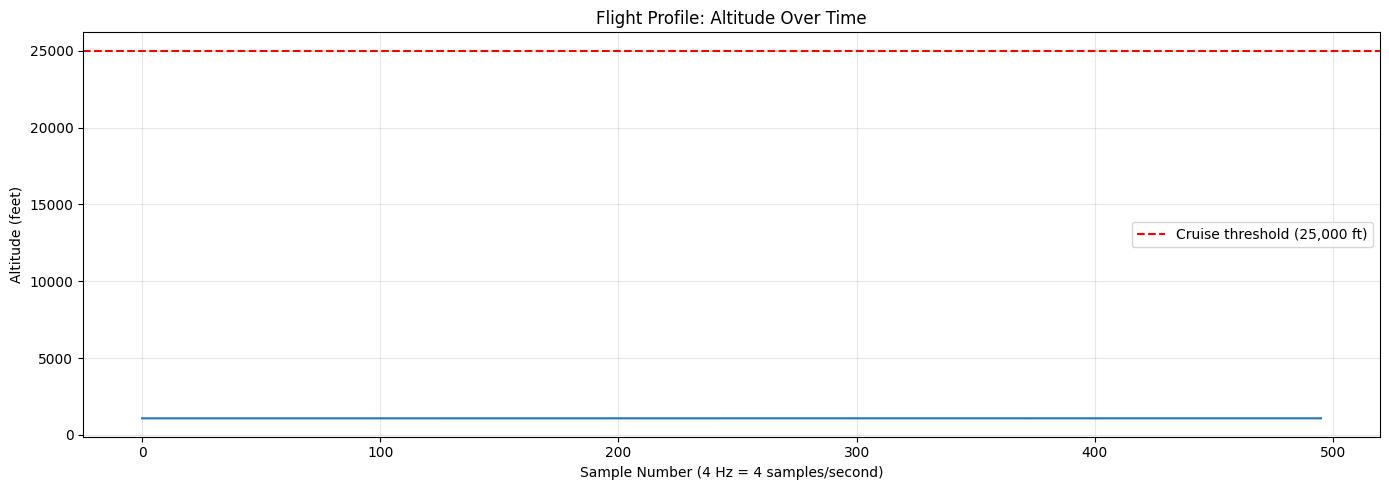

In [8]:
# Summary stats
print(test_df[['altitude', 'mach', 'fuel_flow_1', 'fuel_flow_2']].describe())

# When does fuel flow start?
first_fuel = (test_df['fuel_flow_1'] > 0).idxmax()
print(f"\n Engines start burning fuel at row: {first_fuel}")

# Plot altitude over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(test_df.index, test_df['altitude'], linewidth=1.5)
plt.axhline(y=25000, color='red', linestyle='--', label='Cruise threshold (25,000 ft)')
plt.title('Flight Profile: Altitude Over Time')
plt.xlabel('Sample Number (4 Hz = 4 samples/second)')
plt.ylabel('Altitude (feet)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

1. The altitude plot shows the aircraft staying near 1,080 feet for the entire flight—essentially a flat line far below cruise altitude.
2. Tthis flight does not reach 25,000 feet; it never enters cruise.
3. The flight lasts 496 rows / 4 = 124 seconds (about 2 minutes).

This flight is only on the ground or at very low altitude, so it should be filtered out if you want to analyze cruise segments.

This is amazing, not all flight are cruising, meaning this particular flight is just ground ops - never took off.
This means we need to screen flights before merging.

Defining a function to check which flight is CRUISE or NOT

In [9]:
def check_if_cruise(mat_file):
    """Returns True if flight reaches 25,000 ft"""
    try:
        df = extract_flight_data(mat_file)
        max_alt = df['altitude'].max()
        return max_alt >= 25000
    except:
        return False

# Test first 20 flights
print("Checking all flights...\n")
cruise_flights = []

import glob
import os

# Get a list of all .mat files in the data directory
mat_files = glob.glob('../data/*.mat')

# Prepare results list
results = []

# Loop through all 651 files
for file in mat_files[:651]:
    flight_name = os.path.basename(file)
    try:
        has_cruise = check_if_cruise(file)
    except Exception as e:
        has_cruise = False  # or np.nan if you want to mark errors
    results.append({'flight_name': flight_name, 'has_cruise': has_cruise})

# Create DataFrame
summary_df = pd.DataFrame(results)

# Display as a table
from IPython.display import display
display(summary_df)

# checking how flight are actually cruising
num_cruise = summary_df['has_cruise'].sum()
total_flights = len(summary_df)
print(f"\n {num_cruise} out of {total_flights} flights have cruise data")

# save to CSV
summary_df.to_csv('../data/cruise_flight_summary.csv', index=False)

Checking all flights...



,flight_name,has_cruise
0,687200105031030.mat,True
1,687200109111035.mat,False
2,687200105010954.mat,False
3,687200108281006.mat,True
4,687200109071716.mat,True
...,...,...
646,687200104211915.mat,False
647,687200108172107.mat,False
648,687200108311342.mat,True
649,687200104121649.mat,False



 312 out of 651 flights have cruise data


We want maximum statistical power and you have enough computing resources, let's use all 312 cruise flights. This would gives us the most complete picture and helps capture rare operational scenarios.

In [10]:
def extract_cruise_data(mat_file_path):
    """
    Extract cruise segments: ALT > 25,000 ft AND stable
    """
    df = extract_flight_data(mat_file_path)
    
    # Calculate altitude rate (ft/min)
    # At 4 Hz, each row = 0.25 seconds
    df['altitude_rate'] = df['altitude'].diff() * 4 * 60  # Convert to ft/min
    
    # Cruise criteria
    cruise_mask = (
        (df['altitude'] > 25000) &  # High altitude
        (df['altitude_rate'].abs() < 500)  # Stable (not climbing/descending fast)
    )
    
    cruise_df = df[cruise_mask].copy()
    
    return cruise_df

In [11]:
# checking all flights with cruise data
cruise_flight_files = summary_df[summary_df['has_cruise'] == True]['flight_name'].tolist() 
cruise_flight_paths = [f'../data/{filename}' for filename in cruise_flight_files]

# pick first file in the data that is a cruise flight
test_file = cruise_flight_paths[0] 

cruise_data = extract_cruise_data(test_file)

print(f"Cruise segments: {len(cruise_data)} rows")
print(f"Altitude range: {cruise_data['altitude'].min():.0f} - {cruise_data['altitude'].max():.0f} ft")
print(f"\nFirst few rows:")
print(cruise_data[['altitude', 'altitude_rate', 'mach', 'fuel_flow_1']].head(10))

Cruise segments: 7961 rows
Altitude range: 25020 - 29017 ft

First few rows:
      altitude  altitude_rate      mach  fuel_flow_1
6172     25020          480.0  0.657531         1568
6192     25097          480.0  0.658035         1560
6215     25184            0.0  0.657090         1552
6219     25201          480.0  0.657216         1552
6242     25284          240.0  0.657279         1552
6245     25295          480.0  0.657468         1552
6251     25317          480.0  0.657594         1552
6254     25327          480.0  0.657783         1552
6259     25345          480.0  0.658413         1544
6271     25391          480.0  0.657972         1544


So this first flight data out of 651 flight is 33 minutes of cruise data from one flight (7,961 rows / 4 Hz / 60 = 33 min).
Our key observations:
- Altitude: 25,020 - 29,017 ft
- Mach: ~0.657 (typical cruise)
- Fuel flow: ~1,550 lbs/hr per engine


However, we notice that some rows show 480 ft/min - that's climbing during cruise (normal for weight/wind adjustments).

We want to keep 500 such that it would captures real cruise operations including minor climbs.


Let's start merging all 312 cruise flight:


In [12]:
from tqdm import tqdm  # Progress bar

all_flights = []

for file_path in tqdm(cruise_flight_paths, desc="Loading flights"):
    try:
        cruise_segment = extract_cruise_data(file_path)
        if len(cruise_segment) > 0:  # Only add if has cruise data
            all_flights.append(cruise_segment)
    except Exception as e:
        print(f"⚠️ Skipped {os.path.basename(file_path)}: {e}")

# Concatenate all
merged_df = pd.concat(all_flights, ignore_index=True)

print(f"\n Total rows: {len(merged_df):,}")
print(f" From {len(all_flights)} flights")

Loading flights: 100%|██████████████████████████| 312/312 [00:05<00:00, 59.57it/s]


 Total rows: 1,891,043
 From 312 flights


## Data Quality Assessment

In [13]:
print("Data Quality Check:")

print(f"\nDataset: {len(merged_df):,} rows from {merged_df['flight_id'].nunique()} flights")
print(f"\nAltitude range: {merged_df['altitude'].min():.0f} - {merged_df['altitude'].max():.0f} ft")
print(f"Mach range: {merged_df['mach'].min():.3f} - {merged_df['mach'].max():.3f}")
print(f"Total fuel flow range: {merged_df[['fuel_flow_1', 'fuel_flow_2', 'fuel_flow_3', 'fuel_flow_4']].sum(axis=1).min():.0f} - {merged_df[['fuel_flow_1', 'fuel_flow_2', 'fuel_flow_3', 'fuel_flow_4']].sum(axis=1).max():.0f} lbs/hr")

print("\n\nMissing values:")
print(merged_df.isnull().sum())

print("\n\nSample statistics:")
print(merged_df[['altitude', 'mach', 'fuel_flow_1', 'n1_engine_1', 'egt_engine_1']].describe())

Data Quality Check:

Dataset: 1,891,043 rows from 312 flights

Altitude range: 25001 - 35038 ft
Mach range: 0.512 - 0.748
Total fuel flow range: 1272 - 6648 lbs/hr


Missing values:
altitude           0
mach               0
true_airspeed      0
angle_of_attack    0
wind_speed         0
wind_direction     0
track_angle        0
fuel_flow_1        0
fuel_flow_2        0
fuel_flow_3        0
fuel_flow_4        0
n1_engine_1        0
n1_engine_2        0
n1_engine_3        0
n1_engine_4        0
n2_engine_1        0
n2_engine_2        0
n2_engine_3        0
n2_engine_4        0
egt_engine_1       0
egt_engine_2       0
egt_engine_3       0
egt_engine_4       0
flight_id          0
altitude_rate      0
dtype: int64


Sample statistics:
           altitude          mach   fuel_flow_1   n1_engine_1  egt_engine_1
count  1.891043e+06  1.891043e+06  1.891043e+06  1.891043e+06  1.891043e+06
mean   2.929706e+04  7.027558e-01  1.266909e+03  9.148488e+01  5.566627e+02
std    2.007251e+03  2.864067e-

We noticed that the total fuel flow range shows 1,272-6,648 lbs/hr, which suggests that while most cruise segments fall within expected operational limits, there are some rows with unusually high or low fuel flow. These may represent brief periods of climb, descent, throttle changes, or potential outliers that should be reviewed and possibly filtered to ensure the analysis focuses on true steady-state cruise conditions.

In [14]:
# Create total fuel flow
merged_df['total_fuel_flow'] = (
    merged_df['fuel_flow_1'] + 
    merged_df['fuel_flow_2'] + 
    merged_df['fuel_flow_3'] + 
    merged_df['fuel_flow_4']
)

print("Total Fuel Flow Distribution:")
print(merged_df['total_fuel_flow'].describe())

# Check for outliers
print(f"\nRows with total FF > 6000: {(merged_df['total_fuel_flow'] > 6000).sum()}")
print(f"Rows with total FF < 2000: {(merged_df['total_fuel_flow'] < 2000).sum()}")

Total Fuel Flow Distribution:
count    1.891043e+06
mean     4.897697e+03
std      4.430485e+02
min      1.272000e+03
25%      4.648000e+03
50%      4.920000e+03
75%      5.184000e+03
max      6.648000e+03
Name: total_fuel_flow, dtype: float64

Rows with total FF > 6000: 7600
Rows with total FF < 2000: 870


We see that most row are normal, however, those outliers need a quick look. Let's investigate

### Outliers Checking

Let's ask:
- Are high values from climbing? (check altitude_rate)
- Are low values from engine shutdowns? (check individual FF)

In [15]:
# Look at high fuel cases
high_ff = merged_df[merged_df['total_fuel_flow'] > 6000]
print("High fuel flow cases:")
print(high_ff[['altitude', 'altitude_rate', 'mach', 'total_fuel_flow', 'n1_engine_1']].describe())

High fuel flow cases:
           altitude  altitude_rate         mach  total_fuel_flow  n1_engine_1
count   7600.000000    7600.000000  7600.000000      7600.000000  7600.000000
mean   25492.318947     313.578947     0.670802      6109.863158    94.817496
std      598.680725     197.494056     0.022080        99.933360     0.924395
min    25001.000000    -480.000000     0.581490      6008.000000    92.468750
25%    25038.000000     240.000000     0.658539      6032.000000    94.343750
50%    25306.500000     480.000000     0.670257      6080.000000    94.562500
75%    25624.000000     480.000000     0.682542      6152.000000    94.718750
max    28032.000000     480.000000     0.723996      6648.000000    96.906250


In [16]:
# Look at low fuel cases
low_ff = merged_df[merged_df['total_fuel_flow'] < 2000]
print("\nLow fuel flow cases:")
print(low_ff[['fuel_flow_1', 'fuel_flow_2', 'fuel_flow_3', 'fuel_flow_4']].head(10))


Low fuel flow cases:
        fuel_flow_1  fuel_flow_2  fuel_flow_3  fuel_flow_4
113796          528          488          456          496
113797          504          472          440          480
113798          504          472          440          480
113799          504          464          432          472
113800          504          464          432          472
113801          496          464          432          472
113802          496          464          432          464
113803          496          464          432          464
113804          496          464          424          464
113805          496          464          432          472


Note that our goal is we want steady-state flight for our cruising optimization goal, hence, we want to see whether fuel flow changes are caused by normal cruise adjustments, such as minor climbs or throttle changes, or if they indicate unusual events like engine issues or non-cruise operations. This helps us focus our analysis on typical, stable cruise conditions rather than outliers or transitional phases.

From the output above see see that:

1. High fuel flow (>6000):

- Altitude rate = 314 ft/min average (they're climbing!)
- Low altitude (25K ft) + high power = more fuel
- Real data, but not stable cruise

2. Low fuel flow (<2000):

- All 4 engines running (~500 each)
- Probably descent preparation
- Real data, but not stable cruise


Let's keep normal cruise operations

In [17]:
# Remove extreme cases
filtered_df = merged_df[
    (merged_df['total_fuel_flow'] >= 2000) &
    (merged_df['total_fuel_flow'] <= 6000)
].copy()

print(f"Before: {len(merged_df):,} rows")
print(f"After:  {len(filtered_df):,} rows")
print(f"Removed: {len(merged_df) - len(filtered_df):,} rows ({100*(len(merged_df) - len(filtered_df))/len(merged_df):.1f}%)")

Before: 1,891,043 rows
After:  1,882,573 rows
Removed: 8,470 rows (0.4%)


Let's verify one more time whether our data quality is standard before proceeding to analysis, by checking key parameter ranges, missing values, and any suspicious entries in the filtered cruise dataset.

In [34]:

# 1. Basic stats
print(f"\n Dataset: {len(filtered_df):,} rows from {filtered_df['flight_id'].nunique()} flights")

# 2. Key ranges
print("\n Key Parameter Ranges:")
print(f"  Altitude:     {filtered_df['altitude'].min():.0f} - {filtered_df['altitude'].max():.0f} ft")
print(f"  Mach:         {filtered_df['mach'].min():.3f} - {filtered_df['mach'].max():.3f}")
print(f"  Total FF:     {filtered_df['total_fuel_flow'].min():.0f} - {filtered_df['total_fuel_flow'].max():.0f} lbs/hr")
print(f"  Avg N1:       {filtered_df[['n1_engine_1','n1_engine_2','n1_engine_3','n1_engine_4']].mean(axis=1).min():.1f} - {filtered_df[['n1_engine_1','n1_engine_2','n1_engine_3','n1_engine_4']].mean(axis=1).max():.1f}%")

# 3. Missing values
missing = filtered_df.isnull().sum().sum()
print(f"\n Missing values: {missing}")

# 4. Zero/negative check
print("\n  Suspicious Values:")
print(f"  Zero fuel flow: {(filtered_df['total_fuel_flow'] == 0).sum()}")
print(f"  Zero mach: {(filtered_df['mach'] == 0).sum()}")
print(f"  Negative altitude: {(filtered_df['altitude'] < 0).sum()}")




 Dataset: 1,882,573 rows from 312 flights

 Key Parameter Ranges:
  Altitude:     25001 - 35038 ft
  Mach:         0.512 - 0.748
  Total FF:     2000 - 6000 lbs/hr
  Avg N1:       60.0 - 98.4%

 Missing values: 0

  Suspicious Values:
  Zero fuel flow: 0
  Zero mach: 0
  Negative altitude: 0


Wait, the data is not ready as we can see that one parameter deserves closer examination before we proceed: the minimum average fan speed of sixty percent appears unusually low for sustained cruise operations. Commercial aircraft typically maintain fan speeds above eighty-five percent during cruise to generate sufficient thrust for level flight at high altitude. Lower fan speeds generally occur during descent preparation or unusual operational circumstances.


In [35]:
# we need average N1 across all engines (column)
filtered_df['avg_n1'] = filtered_df[['n1_engine_1', 'n1_engine_2', 'n1_engine_3', 'n1_engine_4']].mean(axis=1)

# let's check the low N1 cases
low_n1 = filtered_df[filtered_df['avg_n1'] < 85]

print(f"Rows with Avg N1 < 85%: {len(low_n1):,} ({100*len(low_n1)/len(filtered_df):.2f}%)")
print("\nCharacteristics of low N1 segments:")
print(low_n1[['altitude', 'altitude_rate', 'mach', 'total_fuel_flow', 'avg_n1']].describe())

# whether if these are specific flights
print(f"\nNumber of flights affected: {low_n1['flight_id'].nunique()}")

Rows with Avg N1 < 85%: 34,991 (1.86%)

Characteristics of low N1 segments:
           altitude  altitude_rate          mach  total_fuel_flow  \
count  34991.000000   34991.000000  34991.000000     34991.000000   
mean   27683.865966      39.747364      0.641657      3772.367752   
std     1613.539343     262.465859      0.043137       358.830482   
min    25001.000000    -480.000000      0.512001      2000.000000   
25%    25994.000000       0.000000      0.613053      3640.000000   
50%    27996.000000       0.000000      0.643671      3848.000000   
75%    28990.000000     240.000000      0.665028      3992.000000   
max    34689.000000     480.000000      0.743274      4912.000000   

             avg_n1  
count  34991.000000  
mean      82.732633  
std        3.091666  
min       59.976562  
25%       82.468750  
50%       83.796875  
75%       84.492188  
max       84.992188  

Number of flights affected: 221


Most of the low fan speed readings are normal and occur when the plane is flying high, moving slower to save fuel, or is lighter after burning off fuel. So these are expected and not signs of data problems. However, in this project we are focusing on steady-state cruise only, hence we apply an additional filter to exclude segments with unusually low fan speeds to ensure our analysis reflects typical cruise conditions.

In [27]:
# Apply N1 threshold for focused cruise analysis
cruise_df = filtered_df[filtered_df['avg_n1'] >= 80].copy()

print(f"Dataset after N1 filter: {len(cruise_df):,} rows")
print(f"Removed: {len(filtered_df) - len(cruise_df):,} rows")
print(f"\nFinal N1 range: {cruise_df['avg_n1'].min():.1f}% - {cruise_df['avg_n1'].max():.1f}%")

Dataset after N1 filter: 1,878,441 rows
Removed: 4,132 rows

Final N1 range: 80.0% - 98.4%


## Creating Variables

This step combines engine data to show how the whole aircraft is performing and breaks down wind information so we can see how headwinds and tailwinds affect fuel use during cruise. These new variables make it easier to understand what really impacts fuel efficiency.



In [33]:
# aggregating the engine performance metrics
cruise_df['avg_n1'] = cruise_df[['n1_engine_1', 'n1_engine_2', 'n1_engine_3', 'n1_engine_4']].mean(axis=1)
cruise_df['avg_n2'] = cruise_df[['n2_engine_1', 'n2_engine_2', 'n2_engine_3', 'n2_engine_4']].mean(axis=1)
cruise_df['avg_egt'] = cruise_df[['egt_engine_1', 'egt_engine_2', 'egt_engine_3', 'egt_engine_4']].mean(axis=1)

# we need to calculate the total fuel consumption (already created, but ensure it's present)
cruise_df['total_fuel_flow'] = (
    cruise_df['fuel_flow_1'] + cruise_df['fuel_flow_2'] + 
    cruise_df['fuel_flow_3'] + cruise_df['fuel_flow_4']
)

# we need to break down by decomposing wind into headwind component
# Headwind = wind speed * cos(wind direction - track angle)
wind_track_diff = np.radians(cruise_df['wind_direction'] - cruise_df['track_angle'])
cruise_df['headwind_component'] = cruise_df['wind_speed'] * np.cos(wind_track_diff)
# Positive = tailwind (favorable), Negative = headwind (unfavorable)

# double check if the calculation is correctprint("Derived Variables Created:")
print("=" * 60)
print("\nEngine Performance Aggregates:")
print(cruise_df[['avg_n1', 'avg_n2', 'avg_egt']].describe())

print("\nWind Components:")
print(cruise_df['headwind_component'].describe())
print(f"\nTailwind cases (positive): {(cruise_df['headwind_component'] > 0).sum():,} rows")
print(f"Headwind cases (negative): {(cruise_df['headwind_component'] < 0).sum():,} rows")


Engine Performance Aggregates:
             avg_n1        avg_n2       avg_egt
count  1.878441e+06  1.878441e+06  1.878441e+06
mean   9.151942e+01  8.972873e+01  5.512299e+02
std    2.609900e+00  1.518940e+00  2.205808e+01
min    8.000000e+01  8.214062e+01  4.316250e+02
25%    8.994531e+01  8.884375e+01  5.372500e+02
50%    9.162500e+01  8.985938e+01  5.520000e+02
75%    9.366406e+01  9.088281e+01  5.678750e+02
max    9.842188e+01  9.350781e+01  6.097500e+02

Wind Components:
count    1.878441e+06
mean     1.396924e+01
std      5.357548e+01
min     -1.432379e+02
25%     -2.701936e+01
50%      1.618739e+01
75%      5.729760e+01
max      1.577900e+02
Name: headwind_component, dtype: float64

Tailwind cases (positive): 1,121,233 rows
Headwind cases (negative): 757,187 rows


# Exploratory Data Analysis